In [ ]:
"""Calculating Spectroscopic Constants from a Potential Energy Surface"""

__authors__ = "Ashley Ringer McDonald"
__credits__ = ["Dominic A. Sirianni"]
__email__   = ["armcdona@calpoly.edu"]

__copyright__ = "(c) 2008-2019, The Psi4Education Developers"
__license__   = "BSD-3-Clause"
__date__      = "2019-11-18"

# Calculating Spectroscopic Constants from a Potential Energy Surface  
The spectroscopic constants for a diatomic molecule can be calculated from a series of potential energies computed for different bond separations.  In this lab, you will calculate the spectroscopic constants for two molecules (HF and CO) and compare their force constants.  You will also study the effect of using the harmonic approximation in determining the vibrational energy levels.  

To use this lab: As you work through the lab, be sure to execute each code block.  If you don't, then when you try to write you own code, it will tell you the previous variable are undefined because the prior code blocks were not executed.

First we import the electronic structure functions into our notebook.  

In [1]:
import psi4
import numpy as np
import matplotlib.pyplot as plt

Note the new (to us) package imported above, psi4. Psi4 is an electronic structure code that can perform the same sorts of calculations that we've done previously using the web interface of ChemCompute. However, now we can use computational chemistry alongside our Python code, which is *very* powerful.

Our first step in today's lab is to contruct the molecule using the PSI4 input structure and define the values of the bond length, R.  The code below builds an HF molecule, our first system of interest. rvals is a list of bond lengths for the molecule; we will compute the energy of the HF molecule with each of these bond lengths in turn.

In [2]:
mol_tmpl = """H
F 1 **R**"""
rvals = [0.8, 0.85, 0.9, 0.95, 1.0]

Each of the following `psi4.` functions calls uses the Psi4 program.  The `psi4.geometry` function creates the molecule and the `psi4.energy` function calculates the SCF/cc-pVDZ energy. [Note: SCF is a synonym for Hartree-Fock, which we learned about in lecture].

In [3]:
molecules =[]
energies = []
for r in rvals:
    molecule = psi4.geometry(mol_tmpl.replace("**R**", str(r)))
    molecules.append(molecule)
for mol in molecules:
    energy = psi4.energy("SCF/cc-pVDZ", molecule=mol)
    energies.append(energy)
print(rvals)
print(energies)

[0.8, 0.85, 0.9, 0.95, 1.0]
[-100.00264748473288, -100.01584984980559, -100.0196933823201, -100.01702310946877, -100.00985995181892]


Take a moment to marvel; we just did 5 calculations near instantaneously, and were able to easily store the important results of the calculations in list format! Psi4 and Python are a very powerful combination. :) 

Let's print out the result of our energy investigation:

In [6]:
for num, r in enumerate(rvals):
    print(r, '(Angstrom):', energies[num],'Hartree')

0.8 (Angstrom): -100.00264748473288 Hartree
0.85 (Angstrom): -100.01584984980559 Hartree
0.9 (Angstrom): -100.0196933823201 Hartree
0.95 (Angstrom): -100.01702310946877 Hartree
1.0 (Angstrom): -100.00985995181892 Hartree


Activity: *Plot the energies vs. R*

In [ ]:
#Write you code here. Make sure your plot is scientifically professional (title, axes, etc.)


*What is the general trend in the energy for these bond distances? Offer an explaination as to why this seems reasonable.*

Student answer box: 

The next function uses the bonds distances and the energies to derive the spectroscopic constants for the molecule. psi4.diatomic.anharmonicity operates very similarly to the curve_fit function explored in previous labs, and uses your calculation data (bond lengths and corresponding energies) to fit the H-F potential energy surface to both a harmonic oscillator model (shown below in blue) and an anharmonic "quartic" model (shown in green). Review [our lecture video on IR spectroscopy](https://youtu.be/-pslROnW27o) if you've forgotten the theory behind these models.

The fitted model parameters are output to a [python dictionary](https://realpython.com/python-dicts/) which is called data in this example.  All of the values are given in cm$^{-1}$.

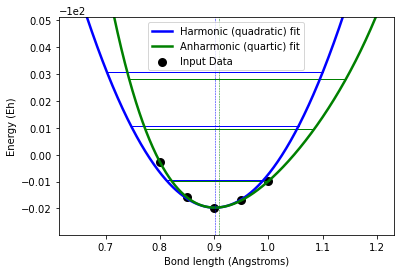

{'re': 0.9014127115138529, 'r0': 0.909919977006772, 'we': 4440.843495349098, 'wexe': 95.78946456200225, 'nu': 4249.264566225093, 'ZPVE(harmonic)': 2196.4743815340485, 'ZPVE(anharmonic)': 2196.4743815340485, 'Be': 21.677645890484044, 'B0': 21.27419198022977, 'ae': 0.8069078205085519, 'De': 0.0020661669408747955}


In [11]:
data = psi4.diatomic.anharmonicity(rvals, energies, plot_fit='screen')
print(data)

To access an element of data in a later computation, you use the syntax: 

In [12]:
data['nu']

4249.264566225093

Question: *For what range of bond lengths is the harmonic oscillator model a good fit to the H-F data? Where (if anywhere) do you see deviations? What spectroscopic properties (if any) would you expect this model to reproduce accurately, and which (if any) would you expect the model to reproduce poorly?*

Write your answer here:

Question: *For what range of bond lengths is the __anharmonic__ oscillator model a good fit to the H-F data? Where (if anywhere) do you see deviations? What spectroscopic properties (if any) would you expect this model to reproduce accurately, and which (if any) would you expect the model to reproduce poorly?*

Write your answer here:

Activity: *Calculate the energies of the n vibrational levels.  Recall that the vibrational energy levels are given by $$ E_n = \omega_e \left( n+ \frac{1}{2} \right)  - \omega_e x_e \left( n + \frac{1}{2} \right)^2   $$ where the second term is the anharmonic correction.  Assuming J=0, calculate the energy for the n=0 to n=3 energy levels, with and without the anharmonic correction.  Remember, you can access the $ \omega_e $ and $ \omega_e x_e $ values from the `data` dictionary.  Have your code print your values.*

In [ ]:
#Write your code here


Activity: *Calculate the difference between the harmonic and the anharmonic energies and print these values.*

In [ ]:
# Write your code here


*Is it more important to include anharmonicity corrections for ground state energy calculations or excited state calculations? Explain your answer.*

Write your answer here:  

Activity: *Calculate the $ \Delta E $ for n=0 to n=1 and n=1 to n=2.  Compare the results for the harmonic approximation and the anharmonic results.*

In [ ]:
# Write you code here


*Is the spacing of the energy levels equal?  Explain your answer.*  

Write your answer here: 

Activity: *Calculate the force constant for the HF bond in N/m.  $$ \omega_e = \frac{1}{2\pi c} \sqrt \frac{k}{\mu} $$  Remember that $ \mu $ is the reduced mass of HF.*

In [ ]:
# Write your code here


Activity: *Construct and plot the PES for CO.  Determine $\omega_e$, $\omega_e x_e$, $\mu$, and k for CO.  Add additional cells to your jupyter notebook as needed.* 

In [ ]:
# Write your code here:


Question: *Based on your results, is anharmonicity a more significant factor for HF or CO?*

Write your answer here:

Question: *Is the force constant greater for HF or CO?  Do your results agree with the typical bond orders expected for HF and CO?*

Write your answer here:

Lab Summary: *In 500 words or less, summarize the lab objective, procedure, main results, and conclusions.*